In [1]:
import sys, os
PRJ_DIR = '/workspace/template_project/image_classification'
sys.path.append(PRJ_DIR)

In [2]:
from module.metrics import get_metric_function
from module.util import load_yaml, get_tpfp_mapper
from matplotlib import pyplot as plt
import pandas as pd
import os
import cv2

PREDICT_SERIAL = 'DNN_20210322_070350_20210323_021811'
RESULT_DIR = '/workspace/template_project/image_classification/result/'
PREDICT_RESULT_DIR = os.path.join(RESULT_DIR, 'predict')
PREDICT_DIR = os.path.join(os.path.join(PREDICT_RESULT_DIR, PREDICT_SERIAL))

PREDICT_RECORD_PATH = os.path.join(PREDICT_DIR, 'record.yml')
PREDICT_CONFIG_PATH = os.path.join(PREDICT_DIR, 'predict_config.yml')
TRAIN_CONFIG_PATH = os.path.join(PREDICT_DIR, 'train_config.yml')

train_config = load_yaml(TRAIN_CONFIG_PATH)
predict_config = load_yaml(PREDICT_CONFIG_PATH)
predict_record = load_yaml(PREDICT_RECORD_PATH)

METRIC_FUNCTION_STR = train_config['TRAIN']['metric_function']
PREDICT_IMAGE_DATA_DIR = os.path.join(predict_config['DIRECTORY']['data'], 'image')

In [3]:
get_acc = get_metric_function(METRIC_FUNCTION_STR)
get_cm = get_metric_function('confusion_matrix')

In [4]:
y_list = predict_record['test_target_list']
y_pred_list = predict_record['test_target_pred_list']
filename_list = predict_record['test_filename_list']

In [5]:
acc = get_acc(y_list, y_pred_list)
cm = get_cm(y_list, y_pred_list)
tpfp_mapper = get_tpfp_mapper(y_list, y_pred_list, filename_list)

In [6]:
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,31,0,0,0,1,0,1,0,0,0
1,0,37,0,0,0,0,0,0,2,0
2,0,1,31,0,0,1,2,0,0,0
3,0,0,2,26,0,2,0,1,3,1
4,0,0,0,0,33,0,0,0,1,1
5,0,0,0,4,0,25,0,0,0,1
6,0,0,0,0,0,0,33,0,1,0
7,0,0,1,0,0,0,0,36,0,0
8,1,1,0,1,0,0,0,0,29,1
9,1,0,0,0,0,0,0,2,0,31


In [7]:
filename = tpfp_mapper[8, 9][0]
filepath = os.path.join(PREDICT_IMAGE_DATA_DIR, filename)
image = cv2.imread(filepath)

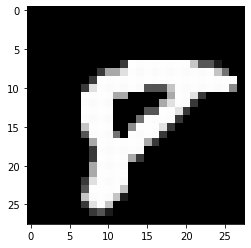

In [8]:
plt.imshow(image)
plt.show()